# First a basic linear regression example
Consider the rate a medicine is repurchased based on its effectiveness.

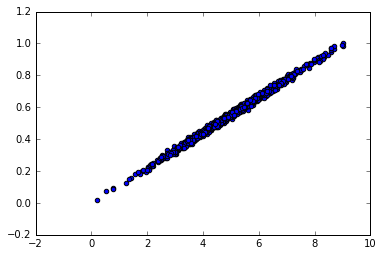

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

dossageEffectiveness = abs(np.random.normal(5.0, 1.5, 1000))
repurchaseRate = (dossageEffectiveness + np.random.normal(0, 0.1, 1000)) * 3
repurchaseRate/=np.max(repurchaseRate)
plt.scatter(dossageEffectiveness, repurchaseRate)
plt.show()

In [36]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(dossageEffectiveness, repurchaseRate)

r_value ** 2

0.99509525372340124

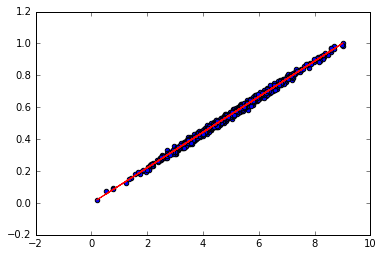

In [37]:
def predict(x):
    return slope * x + intercept

fitLine = predict(dossageEffectiveness)

plt.scatter(dossageEffectiveness, repurchaseRate)
plt.plot(dossageEffectiveness, fitLine, c='r')
plt.show()

# Modify this to a multivariate regression example

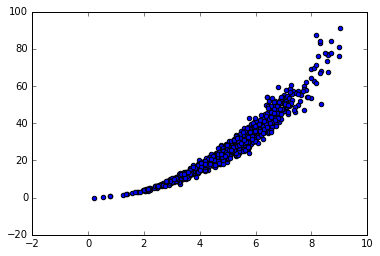

In [41]:

repurchaseRate = np.random.normal(1, 0.1, 1000)*dossageEffectiveness**2

plt.scatter(dossageEffectiveness, repurchaseRate)
plt.show()

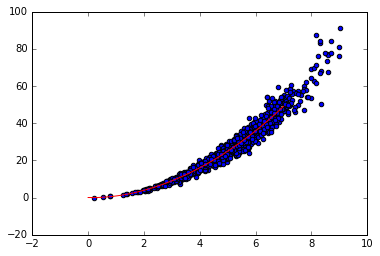

In [42]:
poly = np.poly1d(np.polyfit(dossageEffectiveness, repurchaseRate, 4))

xPoly = np.linspace(0, 7, 100)
plt.scatter(dossageEffectiveness, repurchaseRate)
plt.plot(xPoly, poly(xPoly), c='r')
plt.show()

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(repurchaseRate, poly(dossageEffectiveness))
print r2

0.957161926314


Make distribution more complicated to see if scikit-learn can fit it

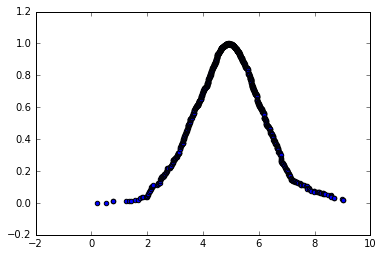

In [58]:
dossageEffectiveness = np.sort(dossageEffectiveness)
repurchaseRate = (dossageEffectiveness + np.random.normal(0, 1, 1000)) * 3
repurchaseRate/=np.max(repurchaseRate)


angles = np.sort(np.random.uniform(0,np.pi,1000))
cs = np.sin(angles)


repurchaseRateComplicated = repurchaseRate+(cs*100)
repurchaseRateComplicated/=np.max(repurchaseRateComplicated)
plt.scatter(dossageEffectiveness, repurchaseRateComplicated)
plt.show()


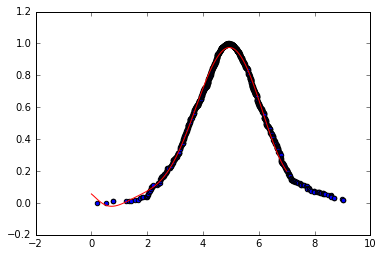

In [63]:
poly = np.poly1d(np.polyfit(dossageEffectiveness, repurchaseRateComplicated, 9))

xPoly = np.linspace(0, 7, 100)
plt.scatter(dossageEffectiveness, repurchaseRateComplicated)
plt.plot(xPoly, poly(xPoly), c='r')
plt.show()

With a high-N polynomial, it is unlikely to hold up to future testing and only fits the test data well.